<a href="https://colab.research.google.com/github/SonalikaSingh/Droupout_Regularization/blob/main/Dropout_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras

Download dataset:https://www.kaggle.com/andrewmvd/heart-failure-clinical-data/tasks?taskId=1177

In [43]:
df=pd.read_csv('heart_failure_dataset.csv')
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Using seaborn to check where data is missing

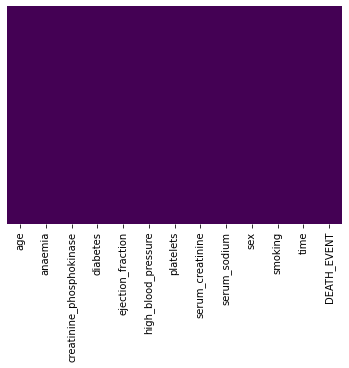

In [44]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [45]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [46]:
df.shape

(299, 13)

Getting all the data between 0 and 1

In [47]:
cols_to_scale = ['creatinine_phosphokinase','age','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [48]:
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0.636364,0,0.071319,0,0.090909,1,0.290823,0.157303,0.485714,1,0,0.000000,1
1,0.272727,0,1.000000,0,0.363636,0,0.288833,0.067416,0.657143,1,0,0.007117,1
2,0.454545,0,0.015693,0,0.090909,0,0.165960,0.089888,0.457143,1,1,0.010676,1
3,0.181818,1,0.011227,0,0.090909,0,0.224148,0.157303,0.685714,1,0,0.010676,1
4,0.454545,1,0.017479,1,0.090909,0,0.365984,0.247191,0.085714,0,0,0.014235,1


In [49]:
X = df.drop('DEATH_EVENT', axis='columns')
y = df['DEATH_EVENT']
y.head(10)

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: DEATH_EVENT, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1)

In [51]:
X_train.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
5,0.909091,1,0.003062,0,0.393939,1,0.216875,0.179775,0.542857,1,1,0.014235
102,0.727273,0,0.111636,0,0.166667,0,0.150200,0.067416,0.885714,1,1,0.295374
38,0.363636,0,0.335928,1,0.242424,0,0.339314,0.202247,0.685714,1,0,0.092527
95,0.327273,1,0.014034,0,0.696970,1,0.235059,0.056180,0.800000,1,0,0.281139
67,0.581818,1,0.011100,0,0.166667,0,0.301734,0.056180,0.771429,1,1,0.217082


In [52]:
X_train.shape

(224, 12)

MODEL WITHOUT DROUPOUT LAYER

In [53]:

model = keras.Sequential([
    keras.layers.Dense(60, input_dim=12, activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.6975 - accuracy: 0.5246
Epoch 2/200
28/28 [==============================] - 0s 1ms/step - loss: 0.6362 - accuracy: 0.6816
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6054 - accuracy: 0.6692
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6306 - accuracy: 0.6194
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5697 - accuracy: 0.6747
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5618 - accuracy: 0.6786
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5338 - accuracy: 0.7211
Epoch 8/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5127 - accuracy: 0.7785
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4393 - accuracy: 0.7970
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.4148 - accuracy: 0.8497
Epoch 11/

In [54]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 1.1590 - accuracy: 0.8133


[1.1589577198028564, 0.8133333325386047]

In [55]:
model.evaluate(X_train,y_train)

7/7 [==============================] - 0s 3ms/step - loss: 0.0390 - accuracy: 0.9821


[0.0389789454638958, 0.9821428656578064]

Training_accuracy>>Test_Accuracy

In [56]:
y_pred = model.predict(X_test).reshape(-1)
y_pred = np.round(y_pred)
print(y_pred)

[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0.
 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0.
 1. 1. 0.]


In [57]:
from sklearn.metrics import confusion_matrix , classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        55
           1       0.67      0.60      0.63        20

    accuracy                           0.81        75
   macro avg       0.76      0.75      0.75        75
weighted avg       0.81      0.81      0.81        75



Model with droupout layer

In [58]:
modeld = keras.Sequential([
    keras.layers.Dense(60, input_dim=12, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

modeld.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

modeld.fit(X_train, y_train, epochs=200, batch_size=8)

Epoch 1/200
28/28 [==============================] - 1s 2ms/step - loss: 0.7097 - accuracy: 0.5603
Epoch 2/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6700 - accuracy: 0.5730
Epoch 3/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6459 - accuracy: 0.6416
Epoch 4/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6517 - accuracy: 0.6545
Epoch 5/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6197 - accuracy: 0.6812
Epoch 6/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6579 - accuracy: 0.6238
Epoch 7/200
28/28 [==============================] - 0s 2ms/step - loss: 0.6093 - accuracy: 0.6435
Epoch 8/200
28/28 [==============================] - 0s 3ms/step - loss: 0.6483 - accuracy: 0.7006
Epoch 9/200
28/28 [==============================] - 0s 2ms/step - loss: 0.5851 - accuracy: 0.6908
Epoch 10/200
28/28 [==============================] - 0s 2ms/step - loss: 0.7153 - accuracy: 0.5502
Epoch 11/

In [59]:
modeld.evaluate(X_test,y_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.3775 - accuracy: 0.8400


[0.37751877307891846, 0.8399999737739563]

In [60]:
modeld.evaluate(X_train,y_train)

7/7 [==============================] - 0s 2ms/step - loss: 0.1950 - accuracy: 0.9152


[0.19504818320274353, 0.9151785969734192]

**CONCLUSION**:*Training accuracy is good but test accuracy improved*

In [61]:
y_pred = modeld.predict(X_test).reshape(-1)
print(y_pred[:10])

# round the values to nearest integer ie 0 or 1
y_pred = np.round(y_pred)
print(y_pred[:10])

[5.9690666e-01 1.2874162e-07 1.4235258e-01 2.6850402e-03 7.9426765e-03
 1.0038820e-01 4.6898693e-02 8.2726479e-03 9.8313558e-01 8.8463248e-06]
[1. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [62]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89        55
           1       0.68      0.75      0.71        20

    accuracy                           0.84        75
   macro avg       0.79      0.81      0.80        75
weighted avg       0.85      0.84      0.84        75

